# Dataset link

https://bayanat.ae/en/Data?themeid=49

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [3]:
df = pd.read_excel("pod_card_db (1).xlsx")

# Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 3508 non-null   object 
 1   Age Groups             3508 non-null   int64  
 2   Year of birth          3508 non-null   int64  
 3   type of disability     3508 non-null   object 
 4   Emirate                3508 non-null   object 
 5   Citizens-Non-Citizens  3508 non-null   object 
 6   nationality            3508 non-null   object 
 7   Issue Date             3508 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 219.4+ KB


In [5]:
df.head()

Gender  Age Groups  Year of birth type of disability     Emirate  \
0    ذكر           7           2009              ذهنية      أبوظبي   
1   أنثى           8           2008               توحد     الشارقة   
2   أنثى           4           2012              جسدية  أم القيوين   
3    ذكر           4           2012              جسدية       عجمان   
4    ذكر           4           2012             متعددة  رأس الخيمة   

  Citizens-Non-Citizens                 nationality    Issue Date  
0                 مواطن   ‏الامارات العربية المتحدة  42689.408906  
1                 مواطن   ‏الامارات العربية المتحدة  42437.563619  
2                 مواطن   ‏الامارات العربية المتحدة  42572.524340  
3             غير مواطن                         مصر  42675.358322  
4             غير مواطن                   جزر القمر  42631.393873

In [6]:
df.sample(5)

Gender  Age Groups  Year of birth type of disability  Emirate  \
3141    ذكر           5           2011               توحد   أبوظبي   
2735   أنثى           5           2011             متعددة   أبوظبي   
2817   أنثى          19           1997              سمعية      دبي   
124     ذكر           3           2013              جسدية   أبوظبي   
2131   أنثى           9           2007              ذهنية  الفجيرة   

     Citizens-Non-Citizens                 nationality    Issue Date  
3141             غير مواطن                       سوريا  42690.406885  
2735                 مواطن   ‏الامارات العربية المتحدة  42633.448933  
2817             غير مواطن                         مصر  42633.353704  
124                  مواطن   ‏الامارات العربية المتحدة  42535.526509  
2131                 مواطن   ‏الامارات العربية المتحدة  42529.432836

# Data Cleaning

In [7]:
df2 = df

### Drop Unuseful Columns

In [8]:
df2 = df.drop('Issue Date', axis=1)

### Handle Missing Values

In [9]:
df2.isnull().sum().max() # No missing values

0

### Duplications

In [10]:
df2.duplicated().sum()

913

In [11]:
df2[df2.duplicated()]

Gender  Age Groups  Year of birth type of disability Emirate  \
80     أنثى          19           1997              ذهنية  أبوظبي   
95     أنثى           4           2012              ذهنية  أبوظبي   
109     ذكر           6           2010               توحد  أبوظبي   
113     ذكر          27           1989              ذهنية  أبوظبي   
125     ذكر          11           2005              ذهنية  أبوظبي   
...     ...         ...            ...                ...     ...   
3501    ذكر           4           2012               توحد  أبوظبي   
3503   أنثى          12           2004              ذهنية  أبوظبي   
3505    ذكر          42           1974              جسدية  أبوظبي   
3506    ذكر           4           2012               توحد  أبوظبي   
3507   أنثى          11           2005             متعددة  أبوظبي   

     Citizens-Non-Citizens                 nationality  
80                   مواطن   ‏الامارات العربية المتحدة  
95                   مواطن   ‏الامارات العربية المتحدة  
109                  مواطن   ‏الامارات العربية المتحدة  
113                  مواطن   ‏الامارات العربية المتحدة  
125                  مواطن   ‏الامارات العربية المتحدة  
...                    ...                         ...  
3501                 مواطن   ‏الامارات العربية المتحدة  
3503                 مواطن   ‏الامارات العربية المتحدة  
3505                 مواطن   ‏الامارات العربية المتحدة  
3506                 مواطن   ‏الامارات العربية المتحدة  
3507                 مواطن   ‏الامارات العربية المتحدة  

[913 rows x 7 columns]

### Rename Columns

In [12]:
df2.columns

Index(['Gender', 'Age Groups', 'Year of birth', 'type of disability',
       'Emirate', 'Citizens-Non-Citizens', 'nationality'],
      dtype='object')

In [13]:
df2.columns = ['Gender','Age','Birth','Disbility','Emirate','Citizenship_Status','Nationality']

In [14]:
df.Gender.unique()[0]

'ذكر'

### Change Values to English

In [15]:
df2.Gender = df2.Gender.apply(lambda x: 'Male' if x == 'ذكر'  else 'Female')

In [16]:
df2.Citizenship_Status.unique()

array(['مواطن', 'غير مواطن'], dtype=object)

In [17]:
df2.Citizenship_Status = df2.Citizenship_Status.apply(lambda x: 'Citizen' if x == 'مواطن' else 'Non-Citizen')

In [18]:
df2.Disbility.unique()

array(['ذهنية', 'توحد', 'جسدية', 'متعددة', 'سمعية', 'بصرية'], dtype=object)

In [19]:
df2.Emirate.unique()

array(['أبوظبي', 'الشارقة', 'أم القيوين', 'عجمان', 'رأس الخيمة', 'دبي',
       'الفجيرة'], dtype=object)

In [20]:
len(df2.Nationality.unique())

67

In [21]:
def changeEmirateToEnglish(emirate):
    if emirate == "دبي":
        return "Dubai"
    elif emirate == "عجمان":
        return "Ajman"
    elif emirate == "رأس الخيمة":
        return "Ras Alkhaima"
    elif emirate == "أم القيوين":
        return "Um ALqiaween"
    elif emirate == "أبوظبي":
        return "Abu Dabi"
    elif emirate == "الفجيرة":
        return "Al Fujaera"
    elif emirate == "الشارقة":
        return "Al Shariqa"

In [22]:
df2.Emirate = df2.Emirate.apply(changeEmirateToEnglish)

In [23]:
df2.Emirate.unique()

array(['Abu Dabi', 'Al Shariqa', 'Um ALqiaween', 'Ajman', 'Ras Alkhaima',
       'Dubai', 'Al Fujaera'], dtype=object)

In [24]:
df2.Age.describe()

count    3508.000000
mean       21.220924
std        17.354534
min         0.000000
25%         7.000000
50%        16.000000
75%        32.000000
max        86.000000
Name: Age, dtype: float64

In [25]:
df = df2

# Statistics

### What is the average ages of disabled people in the UAE?

In [26]:
df.Age.mean()

21.220923603192702

### What is the average of the ages of female disabled people in the UAE?

In [27]:
len(df[df.Gender == 'Female'])

1276

### What is the number of deff cases of females?

In [57]:
len(df[(df.Gender == 'Female') & (df.Disbility == 'سمعية')])

125

### What is the number of disabled Citezen who have been born between the years 2000 and 2005?

In [58]:
len(df[(df.Birth > 2000) & (df.Birth < 2005) & (df.Citizenship_Status == 'Citizen')])

151

### What is the average age of the disabled people in each Emirate?

In [28]:
df.groupby("Emirate").Age.mean()

Emirate
Abu Dabi        19.610272
Ajman           20.851613
Al Fujaera      20.562500
Al Shariqa      23.810552
Dubai           19.842960
Ras Alkhaima    24.032000
Um ALqiaween    23.370370
Name: Age, dtype: float64

### What is the number of disabled people in each Emirate sorted ascending?

In [29]:
df.Emirate.value_counts().sort_values()

Um ALqiaween     108
Al Fujaera       128
Ras Alkhaima     250
Ajman            310
Dubai            554
Al Shariqa       834
Abu Dabi        1324
Name: Emirate, dtype: int64

### What are the most frequent ages for the disabled people in "Abu Dabi" emirate?

<AxesSubplot:>

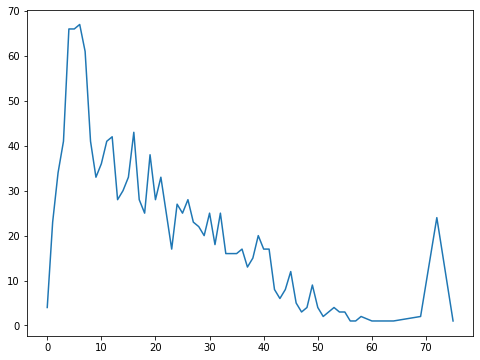

In [30]:
plt.figure(figsize=[8,6])
df[df.Emirate == "Abu Dabi"].Age.value_counts().sort_index().plot.line()

### What is the disabilities ratio for the citizens in each emirate?

<AxesSubplot:>

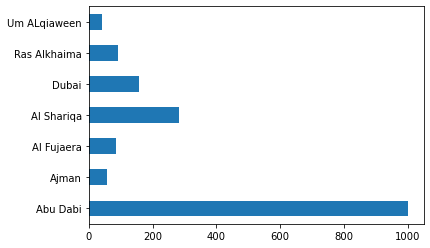

In [31]:
df[df.Citizenship_Status =="Citizen"].Emirate.value_counts().sort_index().plot.barh()

### What is the disabilities ration for the non-citizens in each emirate?

<AxesSubplot:>

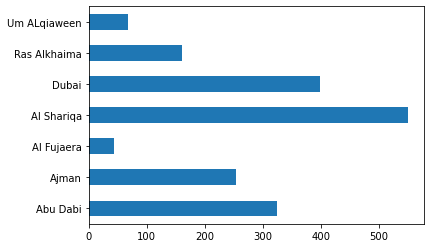

In [32]:
df[df.Citizenship_Status =="Non-Citizen"].Emirate.value_counts().sort_index().plot.barh()

### What is the ratio between citizen and non-citizen disabled people in the UAE?

<AxesSubplot:>

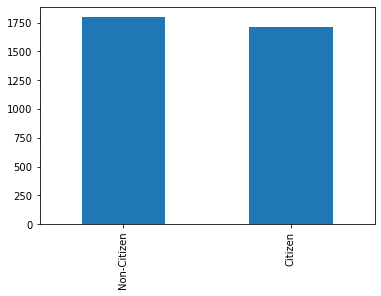

In [33]:
df.Citizenship_Status.value_counts().plot.bar()

<AxesSubplot:>

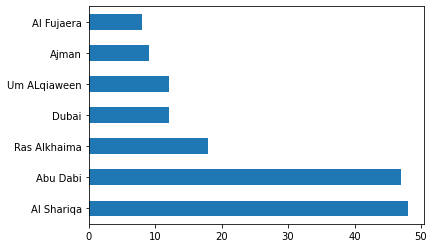

In [65]:
df[df.Disbility == 'بصرية'].Emirate.value_counts().plot.barh()

In [66]:
df.Nationality.values[0]

' \u200fالامارات العربية المتحدة'

<AxesSubplot:ylabel='Disbility'>

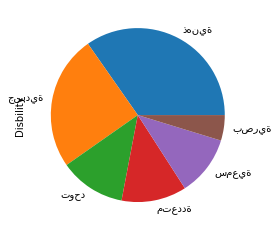

In [68]:
df[df.Nationality == " \u200fالامارات العربية المتحدة"].Disbility.value_counts().plot.pie()

<AxesSubplot:>

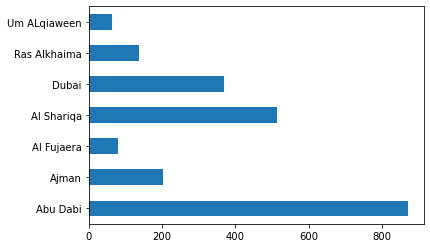

In [69]:
df[df.Gender =="Male"].Emirate.value_counts().sort_index().plot.barh()

<AxesSubplot:>

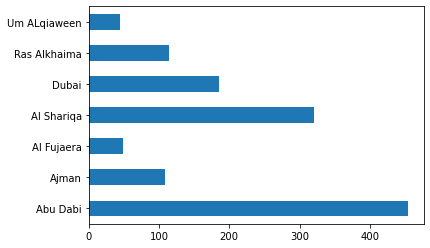

In [70]:
df[df.Gender =="Female"].Emirate.value_counts().sort_index().plot.barh()

<AxesSubplot:>

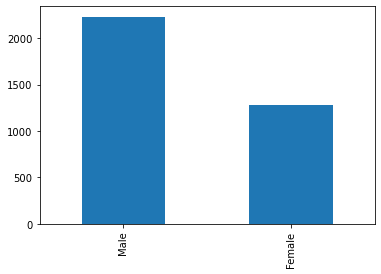

In [71]:
df.Gender.value_counts().plot.bar()

<AxesSubplot:ylabel='Gender'>

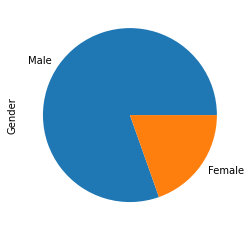

In [72]:
df[df.Disbility == 'توحد'].Gender.value_counts().plot.pie()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              3508 non-null   object
 1   Age                 3508 non-null   int64 
 2   Birth               3508 non-null   int64 
 3   Disbility           3508 non-null   object
 4   Emirate             3508 non-null   object
 5   Citizenship_Status  3508 non-null   object
 6   Nationality         3508 non-null   object
dtypes: int64(2), object(5)
memory usage: 192.0+ KB


In [73]:
df.head()

Gender  Age  Birth Disbility       Emirate Citizenship_Status  \
0    Male    7   2009     ذهنية      Abu Dabi            Citizen   
1  Female    8   2008      توحد    Al Shariqa            Citizen   
2  Female    4   2012     جسدية  Um ALqiaween            Citizen   
3    Male    4   2012     جسدية         Ajman        Non-Citizen   
4    Male    4   2012    متعددة  Ras Alkhaima        Non-Citizen   

                  Nationality  
0   ‏الامارات العربية المتحدة  
1   ‏الامارات العربية المتحدة  
2   ‏الامارات العربية المتحدة  
3                         مصر  
4                   جزر القمر